In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model

In [2]:
# Load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# Give the dimensions of the dataset
diabetes.shape

(768, 9)

In [4]:
# Give the statistical details of the dataset
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
# How many people of this dataset have actually diabetes?
diabetes.groupby('Outcome')['Age'].count()

Outcome
0    500
1    268
Name: Age, dtype: int64

In [6]:
# Find the minimum values for each column
diabetes.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [7]:
# Blood pressure : By observing the data we can see that there are 0 values for blood pressure. 
# And it is evident that the readings of the data set seems wrong 
# because a living person cannot have diastolic blood pressure of zero. 
# How many records have bloodpressure == 0?
diabetes[diabetes.BloodPressure == 0]['BloodPressure'].count()

35

In [8]:
# Plasma glucose levels : Even after fasting glucose level would not be as low as zero. Therefor zero is an invalid reading. 
# How many records have Glucose level == 0?
diabetes[diabetes.Glucose == 0]['Glucose'].count()

5

In [9]:
# Skin Fold Thickness : For normal people skin fold thickness can’t be less than 10 mm better yet zero. 
# How many records have SkinThickness == 0?
diabetes[diabetes.SkinThickness == 0]['SkinThickness'].count()

227

In [10]:
# BMI : Should not be 0 or close to zero unless the person is really underweight which could be life threatening.
# How many records have BMI == 0?
diabetes[diabetes.BMI == 0]['BMI'].count()

11

In [11]:
# Insulin : Only in a rare situation a person can have zero insulin
# How many records have Insulin == 0?
diabetes[diabetes.Insulin == 0]['Insulin'].count()

374

In [12]:
# Remove the rows which have zero for 'BloodPressure', 'BMI' and 'Glucose'
diabetes = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

In [13]:
# Give the new dimensions of diabetes
diabetes.shape

(724, 9)

In [14]:
diabetes.groupby('Outcome').count()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                475      475            475            475      475  475   
1                249      249            249            249      249  249   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             475  475  
1                             249  249

In [15]:
# Use Logistic Regression to try to predict the value for Outcome

In [16]:
import sklearn
from sklearn.model_selection import train_test_split
X = diabetes.drop(['Outcome','Age'],axis=1)
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

print('intercept')
print(model.intercept_)
print()

print('slope')
print(model.coef_)
print()

intercept
[-5.04195178]

slope
[[ 1.68385791e-01  2.78359844e-02 -3.32956674e-02 -3.75739908e-03
   3.40330977e-04  6.52348015e-02  8.22468379e-01]]



In [18]:
y_predict = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.6788990825688074

In [20]:
results = pd.DataFrame({'true':y_test,'estimated':y_predict})
results['TP'] = np.where((results['true'] == 1) & (results['estimated'] == 1),1,0)
results['TN'] = np.where((results['true'] == 0) & (results['estimated'] == 0),1,0)
results['FP'] = np.where((results['true'] == 0) & (results['estimated'] == 1),1,0)
results['FN'] = np.where((results['true'] == 1) & (results['estimated'] == 0),1,0)

In [21]:
FNrate = results['FN'].sum()/(results['FN'].sum() + results['TP'].sum())
print(FNrate)

0.6


In [22]:
FPrate = results['FP'].sum()/(results['FP'].sum() + results['TN'].sum())
print(FPrate)

0.10569105691056911


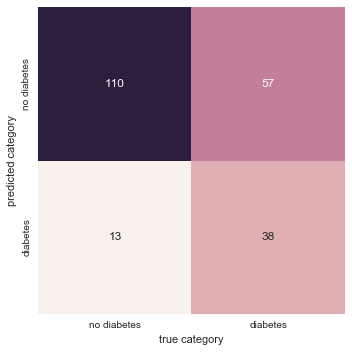

In [23]:
# show confusion matrix
from sklearn.metrics import confusion_matrix

#Matplotlib is a Python visualization library
import matplotlib.pyplot as plt

#Set matplotlib visualization style
plt.style.use('classic')
# specifiy matplotlib graphs are shown "inline" in the ouput
%matplotlib inline

#Seabonr is  a Python data visualization library based on matplotlib
import seaborn as sns;sns.set()

# calculate the confusion matrix
mat = confusion_matrix(y_test,y_predict)

#rename data labels: 0 = not survived, 1 = survived
labels = ['no diabetes','diabetes']

#mat.T = transpose the matrix
# data labels (0,1) are sorted from left to right (for the horizontal axis)
# and from top to bottom (for the vertical axis)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('true category')
plt.ylabel('predicted category')